# Importanto Bibliotecas

In [1]:
import cv2
import os
import xml.etree.ElementTree as ET
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

- Lista arquivos e embaralha os mesmos
- Classificador Haar é uma técnica que utiliza características locais para reconhecer objetos.
- Verifica se eixste arquivo de anotação correspondente
- Converte BGR para RGB
- Pega coordeenadas e adicona informação

In [2]:
def process_images(images_folder, annotations_folder, num_images_to_process=5):
    image_files = os.listdir(images_folder)
    random.shuffle(image_files)

    num_images_to_process = min(num_images_to_process, len(image_files))

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

    for i in range(num_images_to_process):
        image_file = image_files[i]
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)

        annotation_file_path = os.path.join(annotations_folder, image_file.replace('.png', '.xml'))

        if os.path.exists(annotation_file_path):
            tree = ET.parse(annotation_file_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1)
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            for obj in root.findall('object'):
                obj_name = obj.find('name').text
                bndbox = obj.find('bndbox')
                
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

                label = f"{obj_name}"
                ax.text(xmin, ymin - 10, label, color='r', fontsize=9, weight='bold')

In [3]:
images_folder = r'C:\Users\Neri\Downloads\archive (7)\images'
annotations_folder = r'C:\Users\Neri\Downloads\archive (7)\annotations'

Processamento de imagens

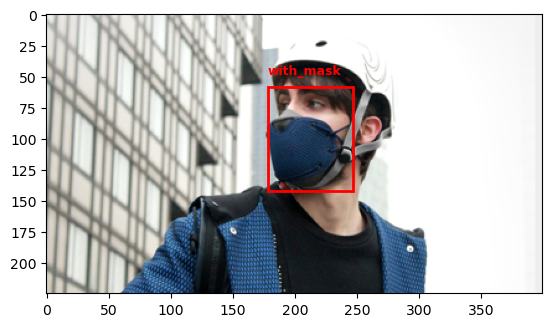

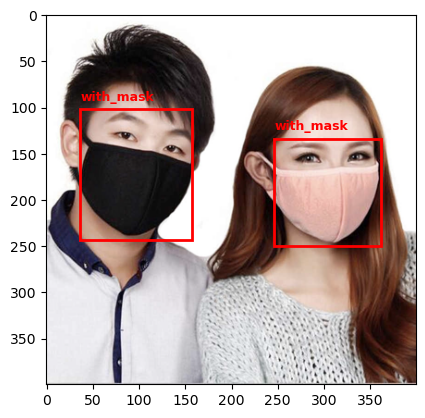

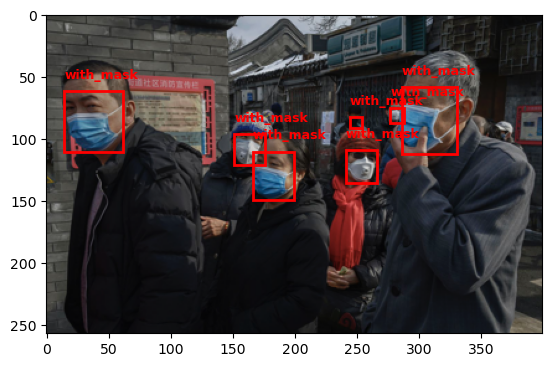

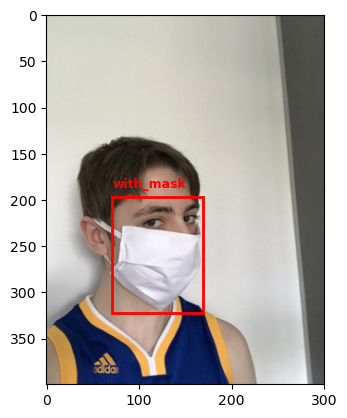

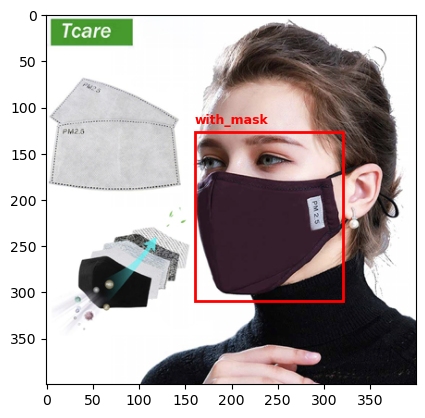

In [4]:
process_images(images_folder, annotations_folder, num_images_to_process=5)


Este script foi desenvolvido para analisar um conjunto de dados destinado à detecção de máscaras faciais, onde as imagens estão anotadas em arquivos XML. Utiliza um classificador Haar Cascade para detectar rostos e a biblioteca Matplotlib para renderizar visualizações. Os retângulos vermelhos indicam as regiões de interesse onde foram detectados rostos, enquanto os rótulos de classe associados são exibidos acima dos retângulos.